Epoch 1/20
25000/25000 [==============================] - 4s 141us/step - loss: 0.7058 - acc: 0.7359
Epoch 2/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.5023 - acc: 0.8614
Epoch 3/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.4415 - acc: 0.8874
Epoch 4/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.4082 - acc: 0.8965
Epoch 5/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.3849 - acc: 0.9062
Epoch 6/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.3733 - acc: 0.9059
Epoch 7/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.3626 - acc: 0.9104
Epoch 8/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.3542 - acc: 0.9116
Epoch 9/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.3484 - acc: 0.9144
Epoch 10/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.3475 - acc: 0.

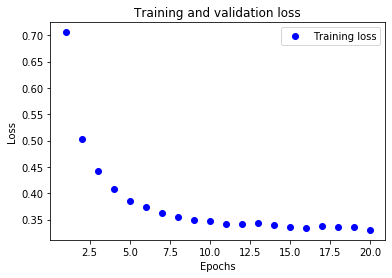

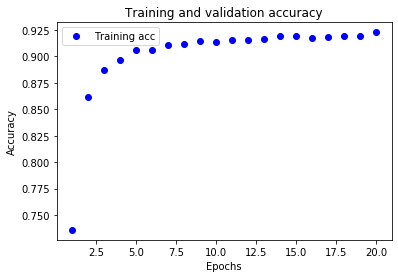

25000/25000 [==============================] - 2s 97us/step
0.40869020797729494 0.88408


In [13]:
from keras.datasets import imdb #here we import the reviews data saved in imbd from keras.dataset
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

#We load the data set into usable variables. The data consists of 25000 samples of
#train_data and 25000 samples of test_data, where each sample consists in review coded in 
#a vector of integers. Each integer corresponds to an index of a word from a word dictionary. For each 
#sample, we have an integer label which value is 0 if the review was positive and 0 if it was negative 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)#num_words limits the size of the vectors of data, by focusing only in 10000 words

#We create a function to map the input vectors of integers into 2D matrices, where each row corresponds 
#to a data sample and each column is equal to 1 if a certain word appears in the text of the sample and 0 if not.
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

#We convert the data 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#We create the neural_network architecture.Initially, it consists in a 3 layered network.The first two layers consist 
#of dense layers with relu activation,which work fine for vector to scalar transformation. The first argument is equal to
#the number of hidden units, which also corresponds to the output dimension of the layer. The last argument is the dimension
#of the input data introduced to the layer. The last layer(also known as the output layer) has only one output, and we use the
#sigmoid activation. We do that as we want to obtain the probability(sigmoid function) that the review is positive or negative
#(only one output for binary classification)
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.003)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.003)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.003)))

#We create a validation set from the original data for testing the nn trained using the 15000 samples left from the original data
"""x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]"""

#We set the optimizer (optimization function), the loss(cost function) and metrics(performance metric of the network)
optimizers.RMSprop(lr=0.0001)
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

#We train the neural network. For that we use the 15000 samples from the training data together with their labels.
#We also set the number of iterations, the number of samples used in each batch SGD iteration and the validation data
n_epochs = 20
history = model.fit(x_train,y_train,epochs = n_epochs, batch_size = 512)

#We plot the evolution of the loss and the accuracy over the iterations to see if our algorithm is performing as expected
history_dict = history.history
#print(history_dict.keys())
loss_values = history_dict['loss']
#val_loss_values = history_dict['val_loss']

epochs = range(1,n_epochs + 1)

plt.plot(epochs,loss_values,'bo',label = 'Training loss')
#plt.plot(epochs,val_loss_values,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
#plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss,test_acc)

In [0]:
help (enumerate)

Help on class enumerate in module builtins:

class enumerate(object)
 |  enumerate(iterable[, start]) -> iterator for index, value of iterable
 |  
 |  Return an enumerate object.  iterable must be another object that supports
 |  iteration.  The enumerate object yields pairs containing a count (from
 |  start, which defaults to zero) and a value yielded by the iterable argument.
 |  enumerate is useful for obtaining an indexed list:
 |      (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.

